In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("DiabetesPrediction_DTC.csv")

In [3]:
df.head(10)

,Age,BMI,Glucose,BloodPressure,DailyActivity,Diabetes
0,29,26.06,146,80,9.85,0
1,48,39.54,187,124,2.30,1
2,41,30.24,74,114,6.33,0
3,56,24.79,196,107,5.82,1
4,50,19.71,83,122,4.07,0
5,66,23.94,159,87,8.55,0
6,27,15.50,82,66,6.71,0
7,23,37.70,148,97,0.68,1
8,62,21.78,137,121,1.63,1
9,56,42.76,129,65,1.81,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            280 non-null    int64  
 1   BMI            280 non-null    float64
 2   Glucose        280 non-null    int64  
 3   BloodPressure  280 non-null    int64  
 4   DailyActivity  280 non-null    float64
 5   Diabetes       280 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 13.3 KB


In [5]:
df.describe()

,Age,BMI,Glucose,BloodPressure,DailyActivity,Diabetes
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,45.128571,30.303750,132.525000,94.235714,4.998036,0.500000
std,14.407705,8.337501,35.508787,19.348015,2.909726,0.500895
min,20.000000,15.060000,70.000000,60.000000,0.010000,0.000000
25%,32.000000,23.610000,101.750000,78.000000,2.642500,0.000000
50%,45.500000,29.770000,131.000000,94.000000,5.145000,0.500000
75%,56.000000,37.200000,162.000000,110.000000,7.415000,1.000000
max,69.000000,44.950000,199.000000,129.000000,9.980000,1.000000


In [6]:
df.columns

Index(['Age', 'BMI', 'Glucose', 'BloodPressure', 'DailyActivity', 'Diabetes'], dtype='object')

In [7]:
x=df[['Age', 'BMI', 'Glucose', 'BloodPressure', 'DailyActivity']].values
y=df['Diabetes']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(
    criterion="gini",   # or "entropy"
    max_depth=4,        # control complexity (you can tune this)
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=4,
                       random_state=42)

In [10]:
y_pred = clf.predict(x_test)

In [11]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nAccuracy:", acc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8035714285714286

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        28
           1       0.87      0.71      0.78        28

    accuracy                           0.80        56
   macro avg       0.81      0.80      0.80        56
weighted avg       0.81      0.80      0.80        56



In [12]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 3, 4, 5, 6, 8, None],
    "min_samples_split": [2, 4, 6, 10],
    "min_samples_leaf": [1, 2, 4, 6]
}

# 5. Set up GridSearchCV
grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,          # use all CPU cores
    error_score="raise" # or "ignore" if you want to silence errors
)

# 6. Fit GridSearchCV
grid.fit(x_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Params: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Accuracy: 0.7772727272727271


In [13]:
clf = DecisionTreeClassifier(
    criterion="gini",   # or "entropy"
    max_depth=8,        # control complexity (you can tune this)
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [14]:
y_pred = clf.predict(x_test)

In [15]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nAccuracy:", acc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7678571428571429

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.76      0.79      0.77        28

    accuracy                           0.77        56
   macro avg       0.77      0.77      0.77        56
weighted avg       0.77      0.77      0.77        56



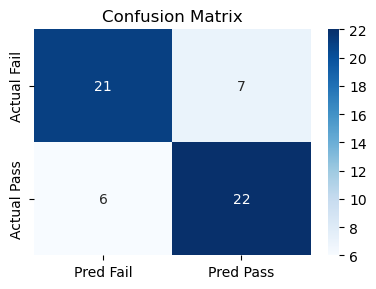

In [16]:
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred Fail", "Pred Pass"],
            yticklabels=["Actual Fail", "Actual Pass"])
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [17]:
df

,Age,BMI,Glucose,BloodPressure,DailyActivity,Diabetes
0,29,26.06,146,80,9.85,0
1,48,39.54,187,124,2.30,1
2,41,30.24,74,114,6.33,0
3,56,24.79,196,107,5.82,1
4,50,19.71,83,122,4.07,0
...,...,...,...,...,...,...
275,44,33.13,134,61,1.48,1
276,55,35.07,97,81,4.31,1
277,66,29.59,190,100,4.25,1
278,38,32.72,83,114,7.83,0


In [18]:
a=np.array([[
    32,
    35.67,
    198,
    123,
    8.34
]])
clf.predict(a)

array([1])